In [2]:
from counter import counter
from common_imports import *

In [3]:
path = "/home/alec/Downloads/wos econ/"

In [11]:
#%pip install wosfile

In [4]:
target_N = 1500

# what terms

In [6]:
cc = counter('wos-econ-20k-titles-all')

Loading wos-econ-20k-titles-all from disk...


In [7]:
cc.summarize()

[(('fy', 't'), (123, 18456)), (('fj', 't'), (689, 18456)), (('fy',), (123,)), (('t',), (18456,)), (('fj',), (689,))]


In [8]:
cc.counts[('t',)]

array([90, 1074, 226, ..., 1, 1, 1], dtype=object)

In [9]:
topis = np.argsort( cc.counts[('t',)] )[-150:]
print(", ".join( [k for k,i in cc.ids['t'].items() if i in topis] ))

equilibrium, public, goods, economy, costs, theory, firm, investment, effect, monetary, general, regulation, comment, economics, information, control, consumer, wages, evidence, market, risk, determinants, distribution, rates, economies, approach, problem, growth, real, united, states, income, structure, international, credit, dynamic, price, case, models, with, expectations, work, history, labor, earnings, between, social, welfare, energy, some, test, insurance, efficiency, model, alternative, tests, using, from, functions, exchange, pricing, value, life, demand, agriculture, size, money, economic, cost, american, implications, world, policy, behavior, empirical, effects, analysis, time, health, application, finance, utility, rate, taxation, developing, countries, foreign, competition, industry, farm, management, policies, regional, corporate, british, state, financial, note, prices, trade, unemployment, markets, employment, choice, wage, interest, capital, education, under, impact, r

In [10]:
terms_to_keepi = set(np.argsort( cc.counts[('t',)] )[-500:])
terms_to_keep = [k for k,i in cc.ids['t'].items() if i in terms_to_keepi] 

In [11]:
terms = cc.items('t')
counts = np.array([ cc(t=t) for t in terms ])
cdict = {t:cc(t=t) for t in terms}

In [12]:
print(len(terms), 'terms, total')

18456 terms, total


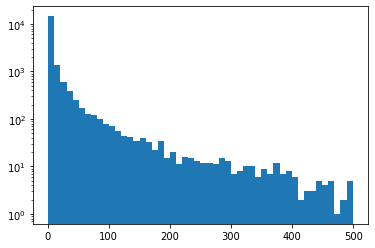

In [13]:
plt.hist(counts[counts<500], bins=50, log=True);

In [18]:
# this code makes sense only when there are two-word tuples

#tup1 = [x for x in terms if '-' not in x]
#tup2 = [x for x in terms if '-' in x]

#tup1_top = sorted(tup1, key=lambda x:cdict[x])[-target_N//2: ]
#tup2_top = sorted(tup2, key=lambda x:cdict[x])[-target_N//2: ]

#terms_to_keep = tup1_top + tup2_top

In [19]:
terms_to_keep = sorted(terms, key=lambda x:cdict[x])[-target_N: ]

In [20]:
len(terms_to_keep)

1500

In [23]:
print(sample(terms_to_keep, 20))

['foundations', 'exploitation', 'provision', 'part', 'content', 'utility', 'mortgage', 'barriers', 'plant', 'plants', 'numbers', 'premium', 'rent', 'temporary', 'racial', 'training', 'valuing', 'markets', 'immigration', 'fluctuations']


In [26]:
with open('terms_to_keep.econ.pickle', 'wb') as outf:
    pickle.dump(terms_to_keep, outf)

# Count among these limited set

In [34]:
with open('terms_to_keep.econ.pickle', 'rb') as inf:
    terms_to_keep = pickle.load(inf)

In [29]:
from load_data import wos_econ

In [30]:
from collections import Counter

cc = counter()

# wosfile will read each file in the list in turn and yield each record
# for further handling
for i, rec in enumerate(wos_econ):
    
    if i % 10000 == 0:
        print(f'Record {i:,}')
        cc.summarize()
        
    # Records are very thin wrappers around a standard Python dict,
    # whose keys are the WoS field tags.
    # Here we look at the SC field (subject categories) and update our counter
    # with the categories in each record.

    tups = rec['title'].lower().split(" ")
    tups = [t for t in tups if t in terms_to_keep]
    
    count(
        cc,
        values = {
            'fy': int(rec['year']),
            'fj': rec['journal'].lower(),
        },
        terms = tups,
        combinations = [
            ('fy','t'),
            ('fj','t'),
            ('fy',),
            ('t',),
            ('fj',),
            ('t1','t2'),
            #('fj','t1','t2'),
            ('fy','t1','t2')
        ]
    )

Blank counter with no name
Record 0
[]
Record 10,000
[(('fy', 't'), (33, 1738)), (('fj', 't'), (151, 1738)), (('fy',), (33,)), (('t',), (1738,)), (('fj',), (151,)), (('t1', 't2'), (1738, 1738)), (('fy', 't1', 't2'), (33, 1738, 1738))]
Record 20,000
[(('fy', 't'), (63, 1738)), (('fj', 't'), (188, 1738)), (('fy',), (63,)), (('t',), (1738,)), (('fj',), (188,)), (('t1', 't2'), (1738, 1738)), (('fy', 't1', 't2'), (63, 1738, 1738))]
Record 30,000
[(('fy', 't'), (63, 1738)), (('fj', 't'), (235, 1738)), (('fy',), (63,)), (('t',), (1738,)), (('fj',), (235,)), (('t1', 't2'), (1738, 1738)), (('fy', 't1', 't2'), (63, 1738, 1738))]
Record 40,000
[(('fy', 't'), (97, 1738)), (('fj', 't'), (366, 1738)), (('fy',), (97,)), (('t',), (1738,)), (('fj',), (366,)), (('t1', 't2'), (1738, 1738)), (('fy', 't1', 't2'), (97, 1738, 1738))]
Record 50,000
[(('fy', 't'), (97, 1738)), (('fj', 't'), (571, 1738)), (('fy',), (97,)), (('t',), (1738,)), (('fj',), (571,)), (('t1', 't2'), (1738, 1738)), (('fy', 't1', 't2'), 

In [31]:
cc.save_counts('wos-econ-20k-titles-limited-cooc')